In [1]:
import numpy as np
import pandas as pa
import matplotlib.pyplot as plt
import seaborn as sn

druguser = pa.read_csv("drug_consumption.csv", names = ['ID',
'Age',
'Gender',
'Education',
'Country',
'Ethnicity',
'Nscore',
'Escore',
'Oscore',
'Ascore',
'Cscore',
'Impulsive',
'SS',
'Alcohol',
'Amphet',
'Amyl',
'Benzos',
'Caff',
'Cannabis',
'Choc',
'Coke',
'Crack',
'Ecstasy',
'Heroin',
'Ketamine',
'Legalh',
'LSD',
'Meth',
'Mushrooms',
'Nicotine',
'Semer',
'VSA'])

druguser.head()

FileNotFoundError: [Errno 2] File b'drug_consumption.csv' does not exist: b'drug_consumption.csv'

In [ ]:
sn.pairplot(druguser, hue = "Coke")

In [ ]:
set(druguser.Coke)

In [ ]:
names = {'CL0':0,'CL1':0,'CL2':0,'CL3':0,'CL4':0,'CL5':1,'CL6':1,0:0, 1:1}
druguser.Coke = druguser.Coke.map(names)
druguser.Coke.head(10)

In [ ]:
X = np.array(druguser[['Cscore','Escore']])
y = np.array(druguser['Coke'])

In [ ]:
import numpy.random as rn

In [ ]:
n = X.shape[0]
test = int(0.20*n)          
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       
y_test = y[:test]
X_train = X[test:]     
y_train = y[test:]

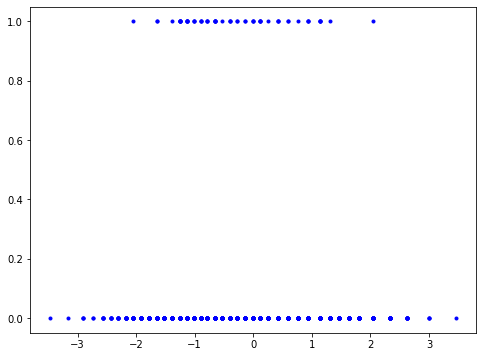

In [35]:
plt.figure(figsize = (8, 6))
plt.plot(X[:,0], y, 'b.');

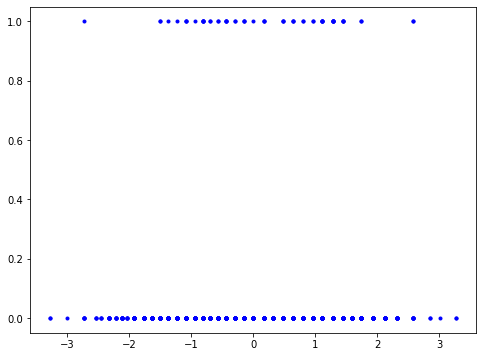

In [36]:
plt.figure(figsize = (8, 6))
plt.plot(X[:,1], y, 'b.');

In [37]:
from sklearn.linear_model import LogisticRegression
lgreg = LogisticRegression(solver='lbfgs')
lgreg.fit(X_train[:,1].reshape(-1,1), y_train);

In [38]:
b, m = *lgreg.intercept_, *lgreg.coef_[0]
b, m

(-3.379186425138361, 0.13146624833541065)

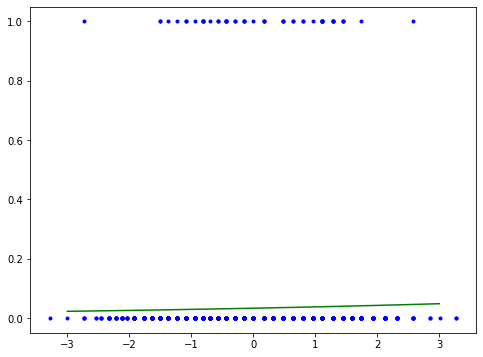

In [39]:
plt.figure(figsize = (8, 6))
plt.plot(X_train[:,1], y_train, 'b.')
xx = np.linspace(-3, 3, 100)
yy = np.exp(m*xx+b)/(1 + np.exp(m*xx+b))
plt.plot(xx, yy, 'g-');

In [40]:
lgreg.score(X_train[:,1].reshape(-1,1),y_train)

0.96684350132626

In [41]:
lgreg.score(X_test[:,1].reshape(-1,1),y_test)

0.9734748010610079

In [ ]:
# To produce the results above, I looked at the pairplot with respect to the drug cocaine ("Coke") and tried to
# find attributes that may have some sort of corrolation. While there is no apparantly evident corrolation between
# any of the attributes, there seemed to be a very slight relationship between cscore (contentiousness) and nscorer
# (neuroticism). So, I made 2 plots: cscore vs. user/non-user of cocaine and nscore vs. user/non-user of cocaine 
# (note: for purposes of these graphs, I classified a "user" as anyone who has used cocaine within the last week.)
# Then, I attempted to use linear regression to find a decision boundary for cocaine user vs. nonuser. As we csn see
# in the plot above, this provides us with a very poor estimate, as the decision boundary is beyond the entirety of
# the data set. The data for cocaine users tends to be in the center, so we could excpect that a linear model would
# not perform well in this situation. Additionally, though about %97 of our data is correctly classified in both the
# testing and training sets, this is likely because more people are non-users of cocaine. In fact, only about %3 of
# the data were classified as a "user" so they were the only incorrectly classified in this case. In summary, though
# it is a useful technique in some settings, linear regression is likely not the best predictor for this dataset.